## Análisis Estadístico, parte II. 

En el notebook de descriptive_statistics hice una revisión de las tendencias y gráficas principales de las variables de interés, y en este notebook la idea es realizar un análisis más profundo. 

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
data <- read.csv('cuarto_cuatrimestre.csv')

In [5]:
head(data)

,X,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,trip_duration,tip_pct,month
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,2019-09-01 00:10:53,2019-09-01 00:23:46,5,2.00,10.5,2.36,14.16,1,1,0.2147222,0.1666667,Septiembre
2,2,2019-09-01 00:27:06,2019-09-01 00:33:22,1,1.73,7.5,1.50,10.30,1,1,0.1044444,0.1456311,Septiembre
3,3,2019-09-01 00:43:23,2019-09-01 00:59:54,1,3.42,14.0,3.06,18.36,1,1,0.2752778,0.1666667,Septiembre
4,4,2019-09-01 00:28:55,2019-09-01 00:52:09,1,4.34,18.0,3.86,23.16,1,1,0.3872222,0.1666667,Septiembre
5,5,2019-09-01 00:13:37,2019-09-01 00:26:46,1,3.59,13.0,5.12,22.17,1,1,0.2191667,0.2309427,Septiembre
6,6,2019-09-01 00:35:43,2019-09-01 00:47:21,1,2.10,9.5,1.70,13.00,1,1,0.1938889,0.1307692,Septiembre


In [6]:
pickup <- data[,2]
pickup_hour <- str_sub(pickup,-8,-7)
dropoff <- data[,3]
dropoff_hour <- str_sub(dropoff,-8,-7)

In [7]:
data$pickup_hour <- pickup_hour
data$dropoff_hour <- dropoff_hour

In [8]:
table(data$pickup_hour)


   00    01    02    03    04    05    06    07    08    09    10    11    12 
17767 12108  8053  5719  4193  3435  6811 17418 28804 30981 28011 26865 27108 
   13    14    15    16    17    18    19    20    21    22    23 
26404 30127 35475 38052 46618 50512 47799 40987 36400 31653 25702 

In [9]:
data$pickup_hour_numeric <- as.numeric(factor(data$pickup_hour))

In [10]:
data$dropoff_hour_numeric <- as.numeric(factor(data$dropoff_hour))

In [11]:
table(data$pickup_hour_numeric)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
17767 12108  8053  5719  4193  3435  6811 17418 28804 30981 28011 26865 27108 
   14    15    16    17    18    19    20    21    22    23    24 
26404 30127 35475 38052 46618 50512 47799 40987 36400 31653 25702 

In [12]:
data$estilo <- ifelse(data$pickup_hour_numeric > 20 | data$pickup_hour_numeric < 5, "Nocturno/Madruagada", 
                     ifelse(data$pickup_hour_numeric < 14 & data$pickup_hour_numeric >= 5, "Matutino", "Vespertino"))

In [13]:
table(data$estilo)


           Matutino Nocturno/Madruagada          Vespertino 
             173626              178389              274987 

In [14]:
head(data)

,X,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,trip_duration,tip_pct,month,pickup_hour,dropoff_hour,pickup_hour_numeric,dropoff_hour_numeric,estilo
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1,2019-09-01 00:10:53,2019-09-01 00:23:46,5,2.00,10.5,2.36,14.16,1,1,0.2147222,0.1666667,Septiembre,00,00,1,1,Nocturno/Madruagada
2,2,2019-09-01 00:27:06,2019-09-01 00:33:22,1,1.73,7.5,1.50,10.30,1,1,0.1044444,0.1456311,Septiembre,00,00,1,1,Nocturno/Madruagada
3,3,2019-09-01 00:43:23,2019-09-01 00:59:54,1,3.42,14.0,3.06,18.36,1,1,0.2752778,0.1666667,Septiembre,00,00,1,1,Nocturno/Madruagada
4,4,2019-09-01 00:28:55,2019-09-01 00:52:09,1,4.34,18.0,3.86,23.16,1,1,0.3872222,0.1666667,Septiembre,00,00,1,1,Nocturno/Madruagada
5,5,2019-09-01 00:13:37,2019-09-01 00:26:46,1,3.59,13.0,5.12,22.17,1,1,0.2191667,0.2309427,Septiembre,00,00,1,1,Nocturno/Madruagada
6,6,2019-09-01 00:35:43,2019-09-01 00:47:21,1,2.10,9.5,1.70,13.00,1,1,0.1938889,0.1307692,Septiembre,00,00,1,1,Nocturno/Madruagada


In [28]:
month <- data[data$month == 'Diciembre',18, drop=FALSE]
table(month$estilo)


           Matutino Nocturno/Madruagada          Vespertino 
              41128               42203               68382 

In [31]:
68382 / nrow(month)

[1] 0.4507326

In [32]:
horarios <- rep(c("Matutino", "Vespertino", "Nocturno/Madruagada"),4)
mes <- rep(c("Septiembre", "Octubre", "Noviembre", "Diciembre"), each=3)
proporciones <- c(.27488, .2953, .4298, .2848, .2789, .4363, .2763, .2859, .4378, .2711, .2781, .4507)

schedule  <- data.frame(horarios, mes, proporciones)
head(schedule)

,horarios,mes,proporciones
,<chr>,<chr>,<dbl>
1,Matutino,Septiembre,0.27488
2,Vespertino,Septiembre,0.29530
3,Nocturno/Madruagada,Septiembre,0.42980
4,Matutino,Octubre,0.28480
5,Vespertino,Octubre,0.27890
6,Nocturno/Madruagada,Octubre,0.43630


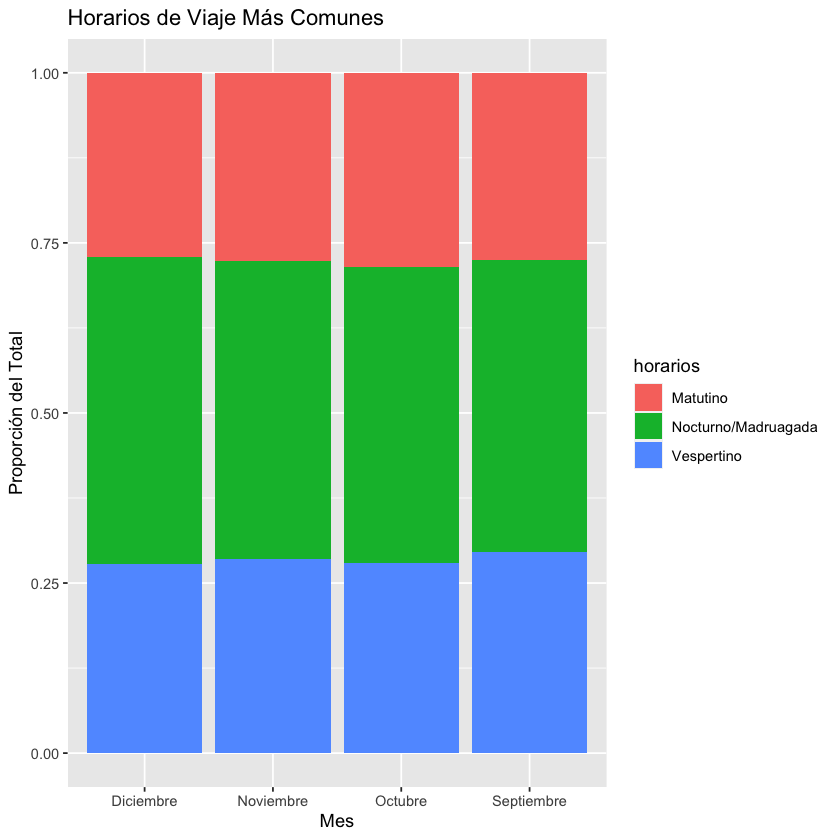

In [34]:
ggplot(schedule, aes(x = mes, y = proporciones, fill = horarios)) +
  geom_col() + 
  ggtitle("Horarios de Viaje Más Comunes") +
  labs(x = "Mes", y = "Proporción del Total")


In [35]:
ggsave(
  'FRECUENCIAS_HORARIOS.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



In [23]:
table(data$pickup_hour)

< table of extent 0 >

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



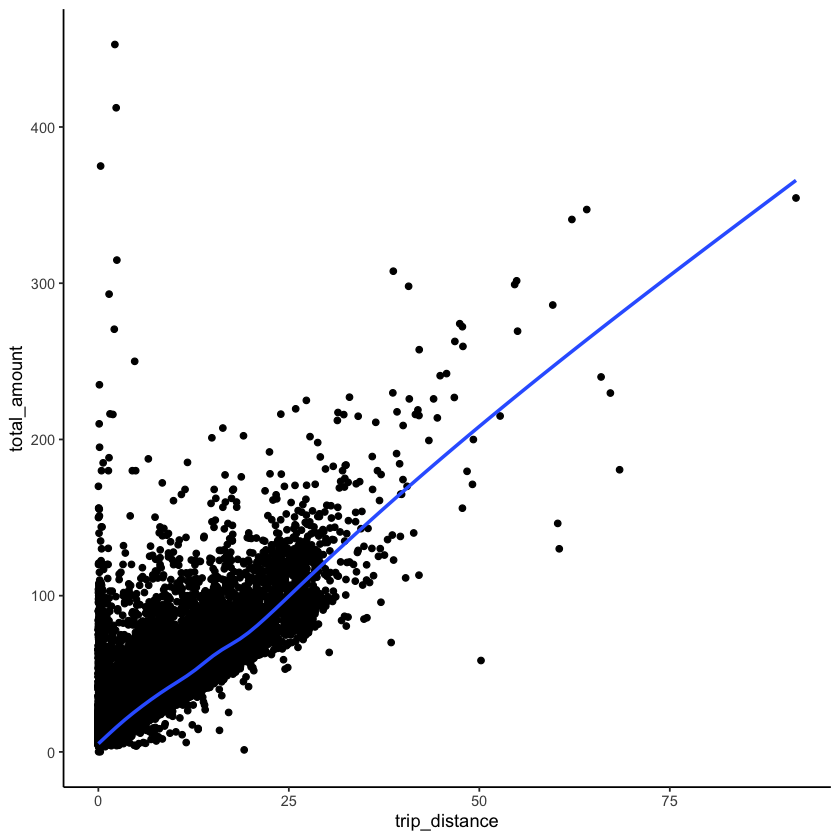

In [8]:
ggplot(data = data) + 
    geom_point(aes(x=trip_distance, y=total_amount)) +
    geom_smooth(aes(x=trip_distance, y=total_amount), se=FALSE) +
    theme_classic()

In [10]:
ggsave(
  'distancia_cobro_NICE.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



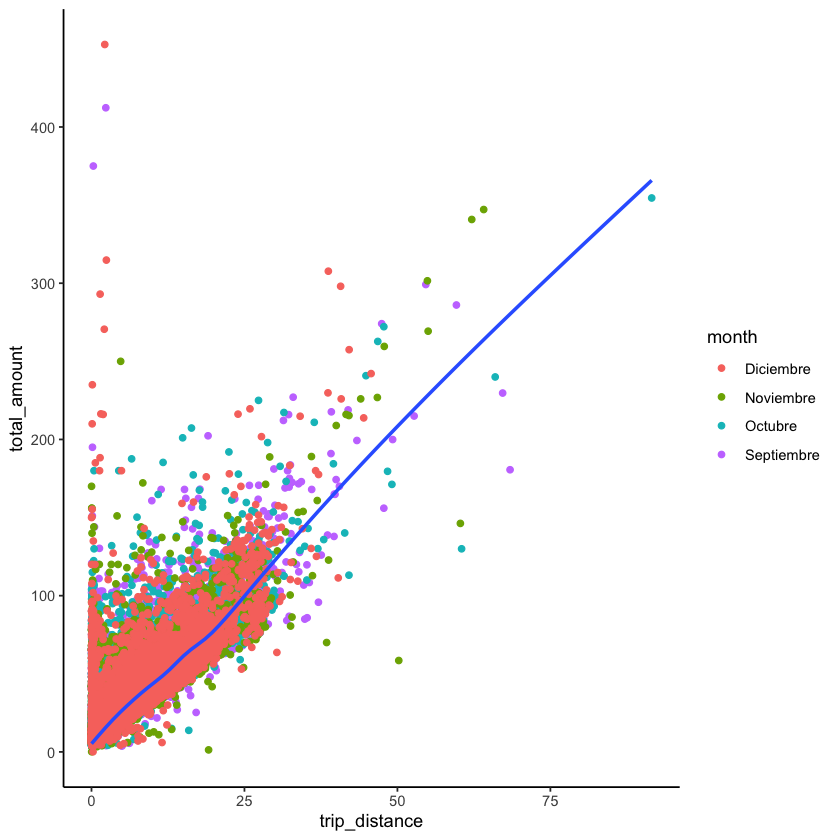

In [11]:
ggplot(data = data) + 
    geom_point(aes(x=trip_distance, y=total_amount, color=month)) +
    geom_smooth(aes(x=trip_distance, y=total_amount), se=FALSE) +
    theme_classic()

In [12]:
ggsave(
  'distancia_cobro_por_mes.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



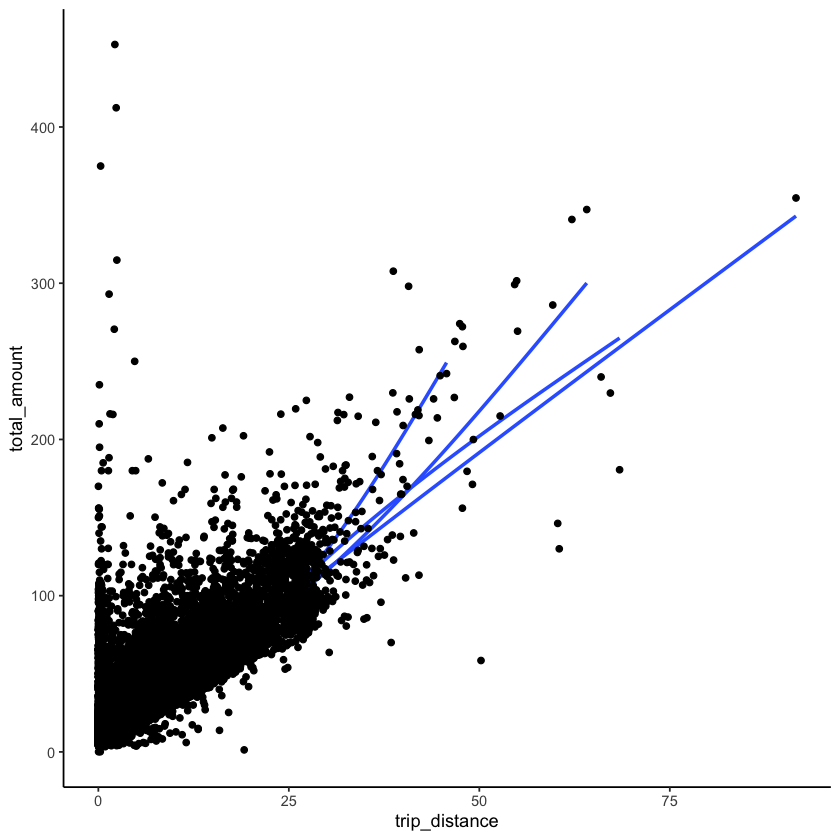

In [14]:
ggplot(data, aes(x=trip_distance, y=total_amount)) + 
    geom_smooth(mapping=aes(group=month), se=FALSE) +
    geom_point() +
    theme_classic()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



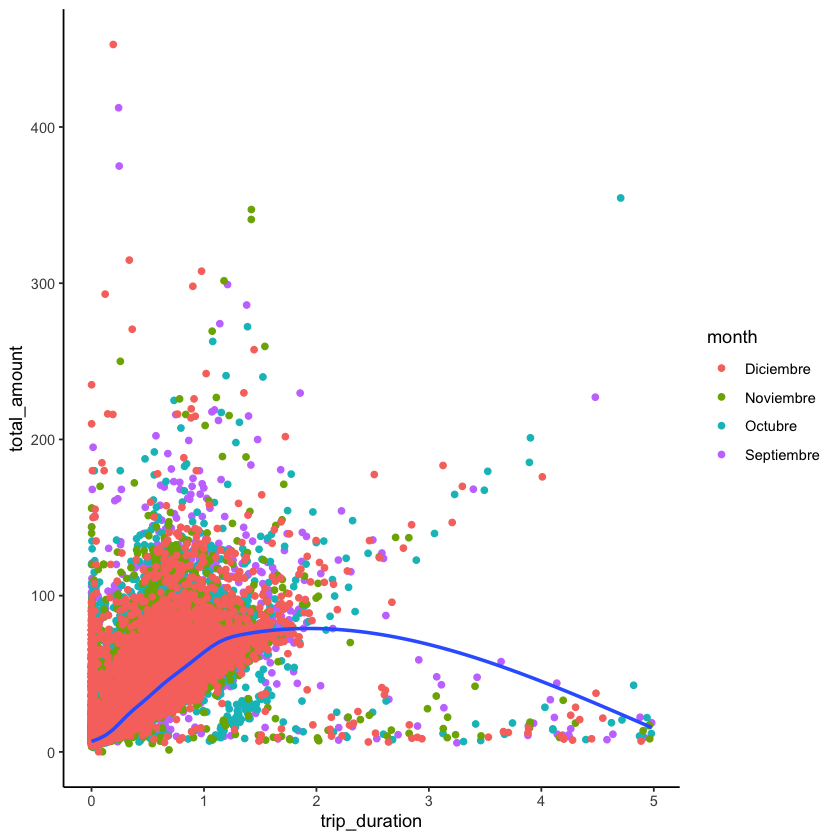

In [38]:
ggplot(data = data) + 
    geom_point(aes(x=trip_duration, y=total_amount, color=month)) +
    geom_smooth(aes(x=trip_duration, y=total_amount), se=FALSE) +
    theme_classic()

In [39]:
ggsave(
  'DURACION_VS_PRECIO.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



In [ ]:
ggplot(data = data) + 
    geom_point(aes(x=pickup_hour_numeric, y=total_amount, color=month)) +
    #geom_smooth(aes(x=pickup_hour_numeric, y=total_amout), se=FALSE) +
    theme_classic() +
    labs(x="Hora de Partida", y="Costo Total", main="Hora de Partida y Costo Total")

In [ ]:
ggsave(
  'HO_VS_PRECIO.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

### Análisis de la propina.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



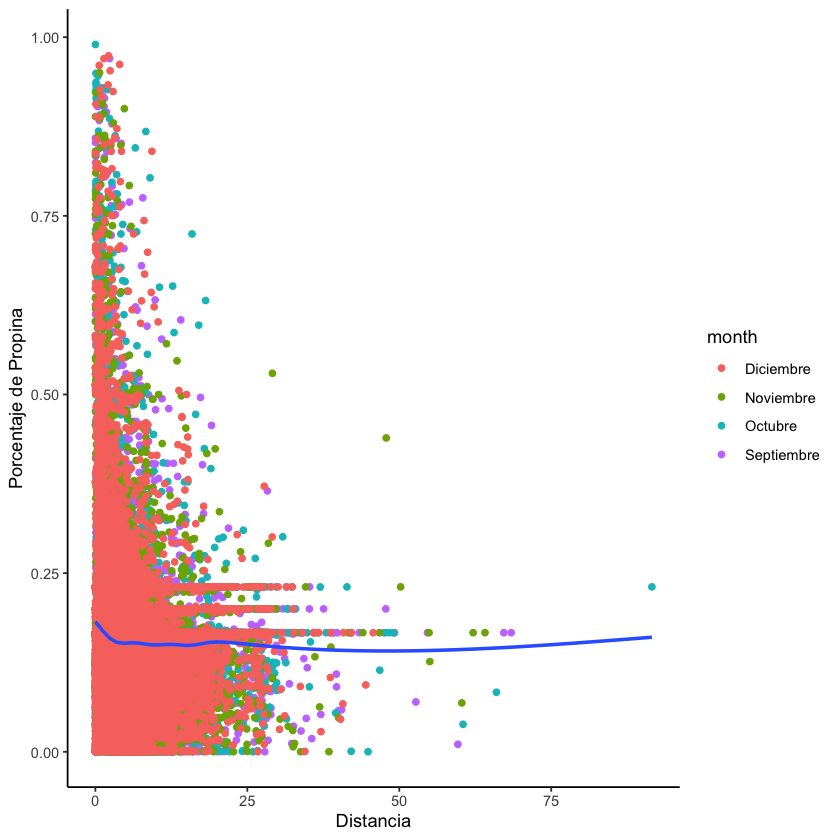

In [17]:
ggplot(data = data) + 
    geom_point(aes(x=trip_distance, y=tip_pct, color=month)) +
    geom_smooth(aes(x=trip_distance, y=tip_pct), se=FALSE) +
    theme_classic() +
    labs(x="Distancia", y="Porcentaje de Propina", main="Distancia vs. Porcentaje de Propina")

In [18]:
ggsave(
  'distancia_propina_por_mes.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



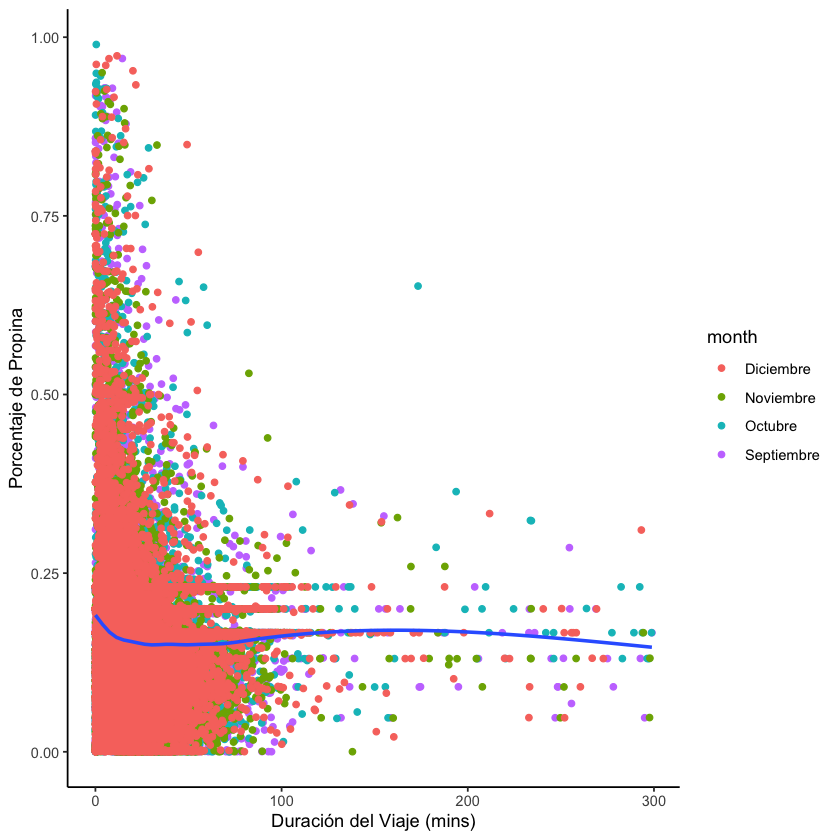

In [19]:
ggplot(data = data) + 
    geom_point(aes(x=trip_duration*60, y=tip_pct, color=month)) +
    geom_smooth(aes(x=trip_duration*60, y=tip_pct), se=FALSE) +
    theme_classic() +
    labs(x="Duración del Viaje (mins)", y="Porcentaje de Propina", main="Duración vs. Porcentaje de Propina")

In [20]:
ggsave(
  'duracion_propina.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



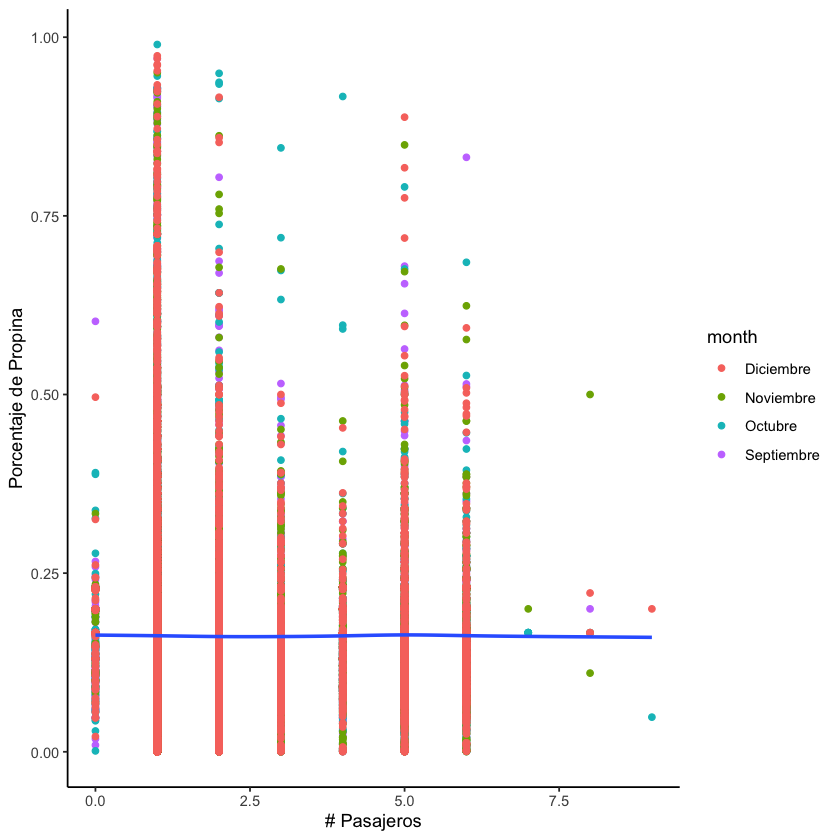

In [21]:
ggplot(data = data) + 
    geom_point(aes(x=passenger_count, y=tip_pct, color=month)) +
    geom_smooth(aes(x=passenger_count, y=tip_pct), se=FALSE) +
    theme_classic() +
    labs(x="# Pasajeros", y="Porcentaje de Propina", main="# Pasajeros vs. Porcentaje de Propina")

In [22]:
ggsave(
  'pasajeros_propina.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



In [8]:
table(data$pickup_hour)


   0:    1:    2:    3:    4:    5:    6:    7:    8:    9: 
86765 75373 66814 57825 34320 38910 44863 64036 79316 78780 

Afectará la hora del viaje a la propina?

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 313460 rows containing non-finite values (stat_smooth).”


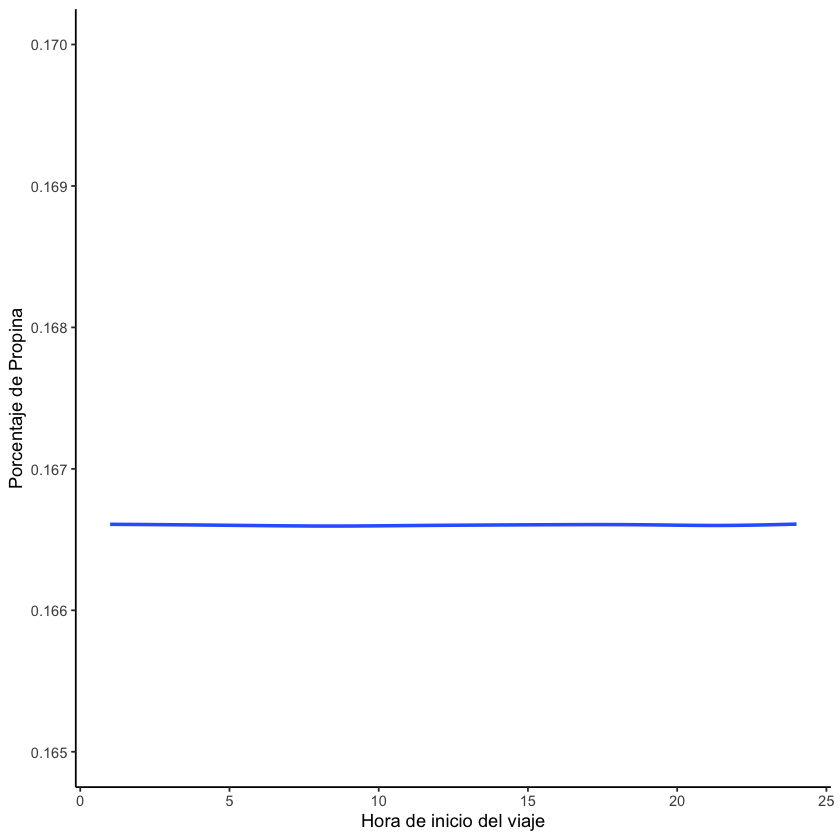

In [36]:
ggplot(data = data) + 
    #geom_point(aes(x=pickup_hour, y=tip_pct)) +
    geom_smooth(aes(x=pickup_hour_numeric, y=tip_pct), se=FALSE) +
    ylim(.165, .170) + 
    theme_classic() +
    labs(x="Hora de inicio del viaje", y="Porcentaje de Propina", main="Hora del día vs. Porcentaje de Propina")

In [33]:
ggsave(
  'YEAAAAAAH.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 19210 rows containing non-finite values (stat_smooth).”


# Regresión Lineal Para explicar el precio total

Se intentará predecir el precio total a partir de la duración del viaje, la distancia recorrida y la hora en que inició el viaje. 

In [34]:
model <- lm(total_amount ~ trip_duration + trip_distance + pickup_hour_numeric, data = data)
summary(model)


Call:
lm(formula = total_amount ~ trip_duration + trip_distance + pickup_hour_numeric, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-109.41   -1.34   -0.51    0.89  438.17 

Coefficients:
                      Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          4.6622199  0.0168258  277.088  < 2e-16 ***
trip_duration       19.6682469  0.0474209  414.759  < 2e-16 ***
trip_distance        2.8993534  0.0028488 1017.745  < 2e-16 ***
pickup_hour_numeric -0.0055914  0.0009164   -6.102 1.05e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.278 on 626998 degrees of freedom
Multiple R-squared:  0.8748,	Adjusted R-squared:  0.8748 
F-statistic: 1.46e+06 on 3 and 626998 DF,  p-value: < 2.2e-16


In [30]:
model <- lm(total_amount ~ trip_duration + trip_distance, data = data)
summary(model)


Call:
lm(formula = total_amount ~ trip_duration + trip_distance, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-109.48   -1.34   -0.51    0.89  438.13 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.575223   0.008934   512.1   <2e-16 ***
trip_duration 19.659185   0.047399   414.8   <2e-16 ***
trip_distance  2.900349   0.002844  1019.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.278 on 626999 degrees of freedom
Multiple R-squared:  0.8748,	Adjusted R-squared:  0.8748 
F-statistic: 2.191e+06 on 2 and 626999 DF,  p-value: < 2.2e-16


In [31]:
model <- lm(total_amount ~ trip_distance, data = data)
summary(model)


Call:
lm(formula = total_amount ~ trip_distance, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-138.66   -2.04   -0.80    1.30  438.05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.516670   0.008590   758.6   <2e-16 ***
trip_distance 3.796233   0.002089  1817.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.829 on 627000 degrees of freedom
Multiple R-squared:  0.8405,	Adjusted R-squared:  0.8405 
F-statistic: 3.303e+06 on 1 and 627000 DF,  p-value: < 2.2e-16


In [32]:
model <- lm(total_amount ~ trip_duration, data = data)
summary(model)


Call:
lm(formula = total_amount ~ trip_duration, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-275.90   -2.39   -1.08    0.80  437.40 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.50543    0.01457   309.3   <2e-16 ***
trip_duration 56.36642    0.05028  1121.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.975 on 627000 degrees of freedom
Multiple R-squared:  0.6672,	Adjusted R-squared:  0.6672 
F-statistic: 1.257e+06 on 1 and 627000 DF,  p-value: < 2.2e-16
